# Project 2

In [3]:
# This project uses scikit-learn machine learning software toolkit
# https://scikit-learn.org/stable/index.html

import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.pipeline import Pipeline 
from sklearn.datasets import load_files
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# to make this notebook's output stable across runs
np.random.seed(42)

# input data 
DATA_DIR = './cleanRaw/'

In [6]:
docs_data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace",
    description=None, load_content=True, shuffle=True, random_state=42)

# calculate count of each category
labels, counts = np.unique(docs_data.target, return_counts=True)

# convert data.target_names to np array for indexing
labels_str = np.array(docs_data.target_names)[labels]

print(dict(zip(labels_str, counts)))

{'democratic': 23, 'republican': 24}


In [8]:
docs_data.target_names

['democratic', 'republican']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(docs_data.data, 
                                                    docs_data.target, test_size=0.4)

In [12]:
# refer to the following information:
# CountVectorizer: Convert a collection of text documents to a matrix of token counts.
# TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation.
# SGDClassifier with loss='log_loss': Linear classifiers with SGD training for logistic regression.
# SGDClassifier with loss='modified_huber': Linear classifiers with SGD training for logistic regression.
#
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

# Use max_features = 1000. Each input file has fewer than 1000 words.

text_clf = Pipeline([('vect', CountVectorizer(stop_words="english", 
                                              max_features=1000, decode_error="ignore")),     
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('text_clf', SGDClassifier(loss='log_loss', penalty='l2', alpha=1e-3))
])

sgd = Pipeline([
        ("count vectorizer", CountVectorizer(stop_words="english", 
                                             max_features=1000, decode_error="ignore")),
        ("sgd", SGDClassifier(loss="modified_huber"))
    ])

sgd_tfidf = Pipeline([
        ("tfidf_vectorizer", TfidfVectorizer(stop_words="english", 
                                             max_features=1000, decode_error="ignore")),
        ("sgd", SGDClassifier(loss="modified_huber"))
    ])
 
svc = Pipeline([
        ("count_vectorizer", CountVectorizer(stop_words="english", 
                                             max_features=1000, decode_error="ignore")),
        ("linear svc", SVC(kernel="linear"))
    ])

svc_tfidf = Pipeline([
        ("tfidf_vectorizer", TfidfVectorizer(stop_words="english", 
                                             max_features=1000, decode_error="ignore")),
        ("linear svc", SVC(kernel="linear"))
    ])

#----------- Question 1) ------------------------------
# add two more classifiers here  <--- do this for project 2
#--------------------------------------------------------
# Naive Bayes: MultinomialNB()
# Random forest
# Decision tree

nb = Pipeline([('vect', CountVectorizer(stop_words="english", 
                                              max_features=1000, decode_error="ignore")),     
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('text_clf', MultinomialNB(alpha=1e-3))
])

dt = Pipeline([('vect', CountVectorizer(stop_words="english", 
                                              max_features=1000, decode_error="ignore")),     
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('text_clf', DecisionTreeClassifier(max_depth = 2))
])

rf = Pipeline([('vect', CountVectorizer(stop_words="english", 
                                              max_features=1000, decode_error="ignore")),     
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('text_clf', RandomForestClassifier(max_depth = 2))
])

# add your two models to the list of models below
models = [
    ("text_clf", text_clf),
    ("sgd", sgd),
    ("sgd_tfidf", sgd_tfidf),
    ("svc", svc),
    ("svc_tfidf", svc_tfidf),
    ("nb", nb),
    ("dt", dt),
    ("rf", rf)
    ]

unsorted_scores = [(name, cross_val_score(model, X_train, y_train, cv=5).mean()) 
                   for name, model in models]
scores = sorted(unsorted_scores, key=lambda x: x[1])
print(scores)  



[('rf', 0.42666666666666664), ('sgd_tfidf', 0.5666666666666667), ('svc_tfidf', 0.5733333333333334), ('dt', 0.5933333333333333), ('sgd', 0.64), ('text_clf', 0.6466666666666667), ('svc', 0.6733333333333335), ('nb', 0.68)]


In [248]:
#---show only the best performace results: accuracy, other metrics, and confusion matrix
#
#---------------- Question 2) -------------------------
# how to automatically find the best classifier <---- do this for project 2
#---------------------------------------------------------
best_model = text_clf                   # here, found the best classifier manually
best_model.fit(X_train, y_train)     
y_pred = best_model.predict(X_test)  

best_score = 0
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score = accuracy_score(y_test, y_pred)
    #print(name + ": " + str(model_score))
    if model_score > best_score:
        #print(name + ": " + str(model_score))
        best_score = model_score
        best_name = name
        best_model = model

#print(best_name)
y_pred = best_model.predict(X_test)  

print (accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred, target_names=docs_data.target_names))

0.631578947368421

              precision    recall  f1-score   support

  democratic       0.64      0.70      0.67        10
  republican       0.62      0.56      0.59         9

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.63      0.63      0.63        19



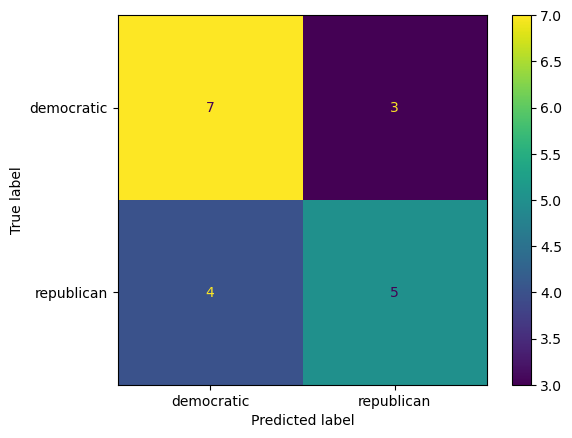

In [250]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=docs_data.target_names).plot()